<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Подготовка-вычислений" data-toc-modified-id="Подготовка-вычислений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка вычислений</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool, cv

#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, TimeSeriesSplit 
from sklearn.metrics import make_scorer


In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1H').sum()

In [3]:
# посмотрим на данные

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [5]:
# проверим пропуски

data.isna().sum()

num_orders    0
dtype: int64

### Вывод:

- Нам даны данные в количестве 4416 строк
- Пропусков нет

Далее проанализируем данные

## Анализ

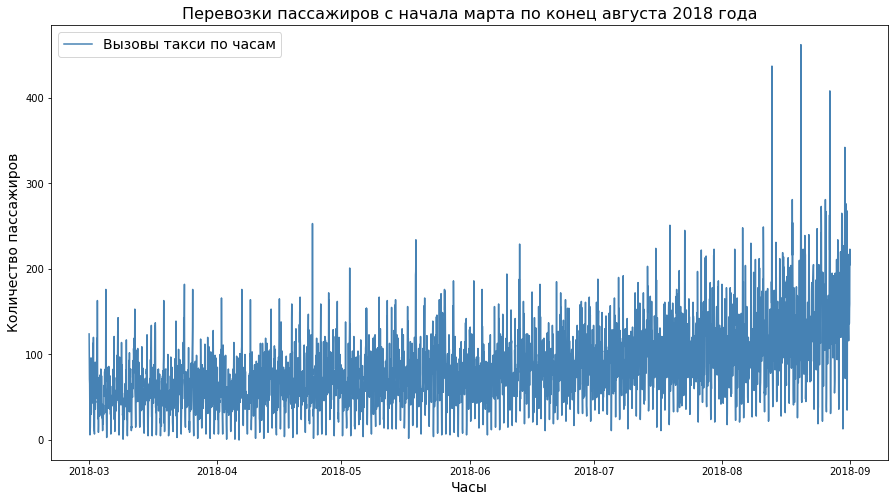

In [6]:
# построим график всех данных

figsize = (15,8)

plt.figure(figsize = figsize)
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(data, label = 'Вызовы такси по часам', color = 'steelblue')

 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Часы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с начала марта по конец августа 2018 года', fontsize = 16)
 

plt.show()

In [7]:
# найдем точные даты начала и конца дат данных

print(data.index.min())
print(data.index.max())

2018-03-01 00:00:00
2018-08-31 23:00:00


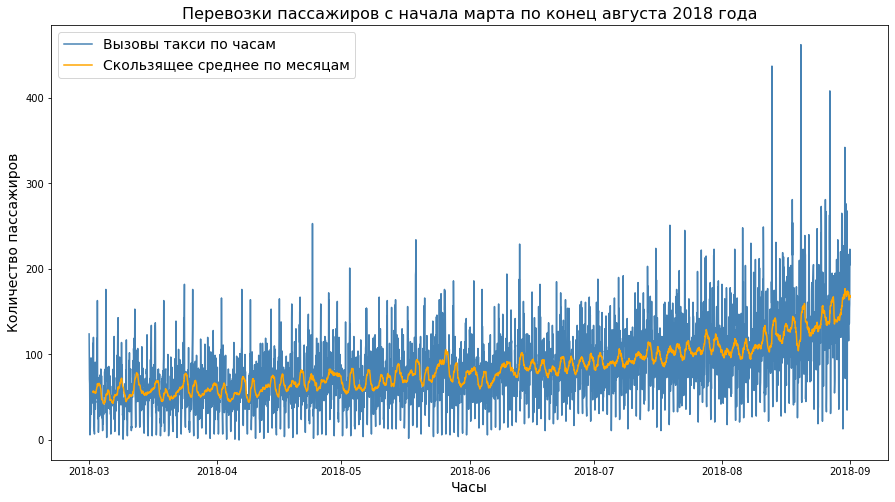

In [8]:
# зададим размер графика

figsize = (15,8)

plt.figure(figsize = figsize)
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(data, label = 'Вызовы такси по часам', color = 'steelblue')
plt.plot(data.rolling(window = 24).mean(), label = 'Скользящее среднее по месяцам', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Часы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с начала марта по конец августа 2018 года', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

Данные представлены за полгода.

In [9]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [10]:
 data.index.is_monotonic 

True

In [11]:
 data['num_orders'].is_monotonic 

False

Построим графики сезонности и трендов.

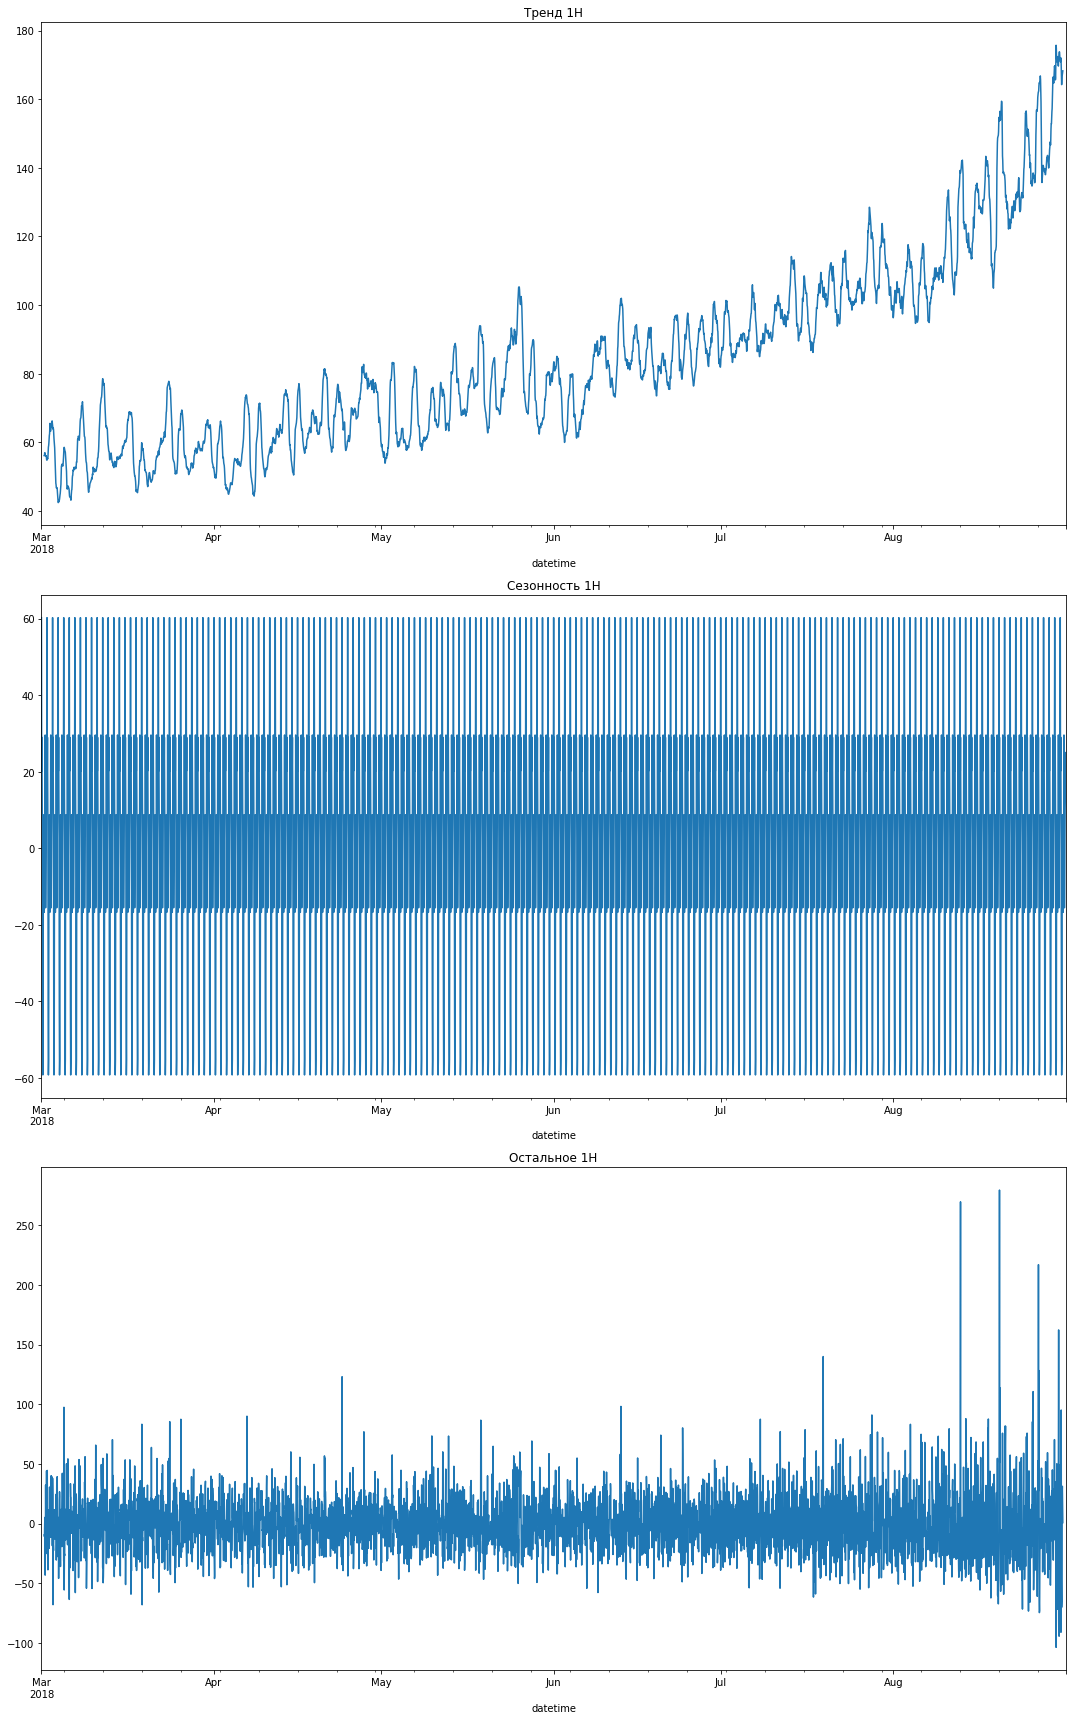

In [12]:
decomposed = seasonal_decompose(data)

figsize_1 = (15, 24)

plt.figure(figsize=figsize_1)

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд 1H')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность 1H')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остальное 1H')
plt.tight_layout()

Довольно большое число данных и сложно отмотреть здесь зависимости. Сделаем разбивку по дням.

In [13]:
data_day = data.resample('1D').sum()

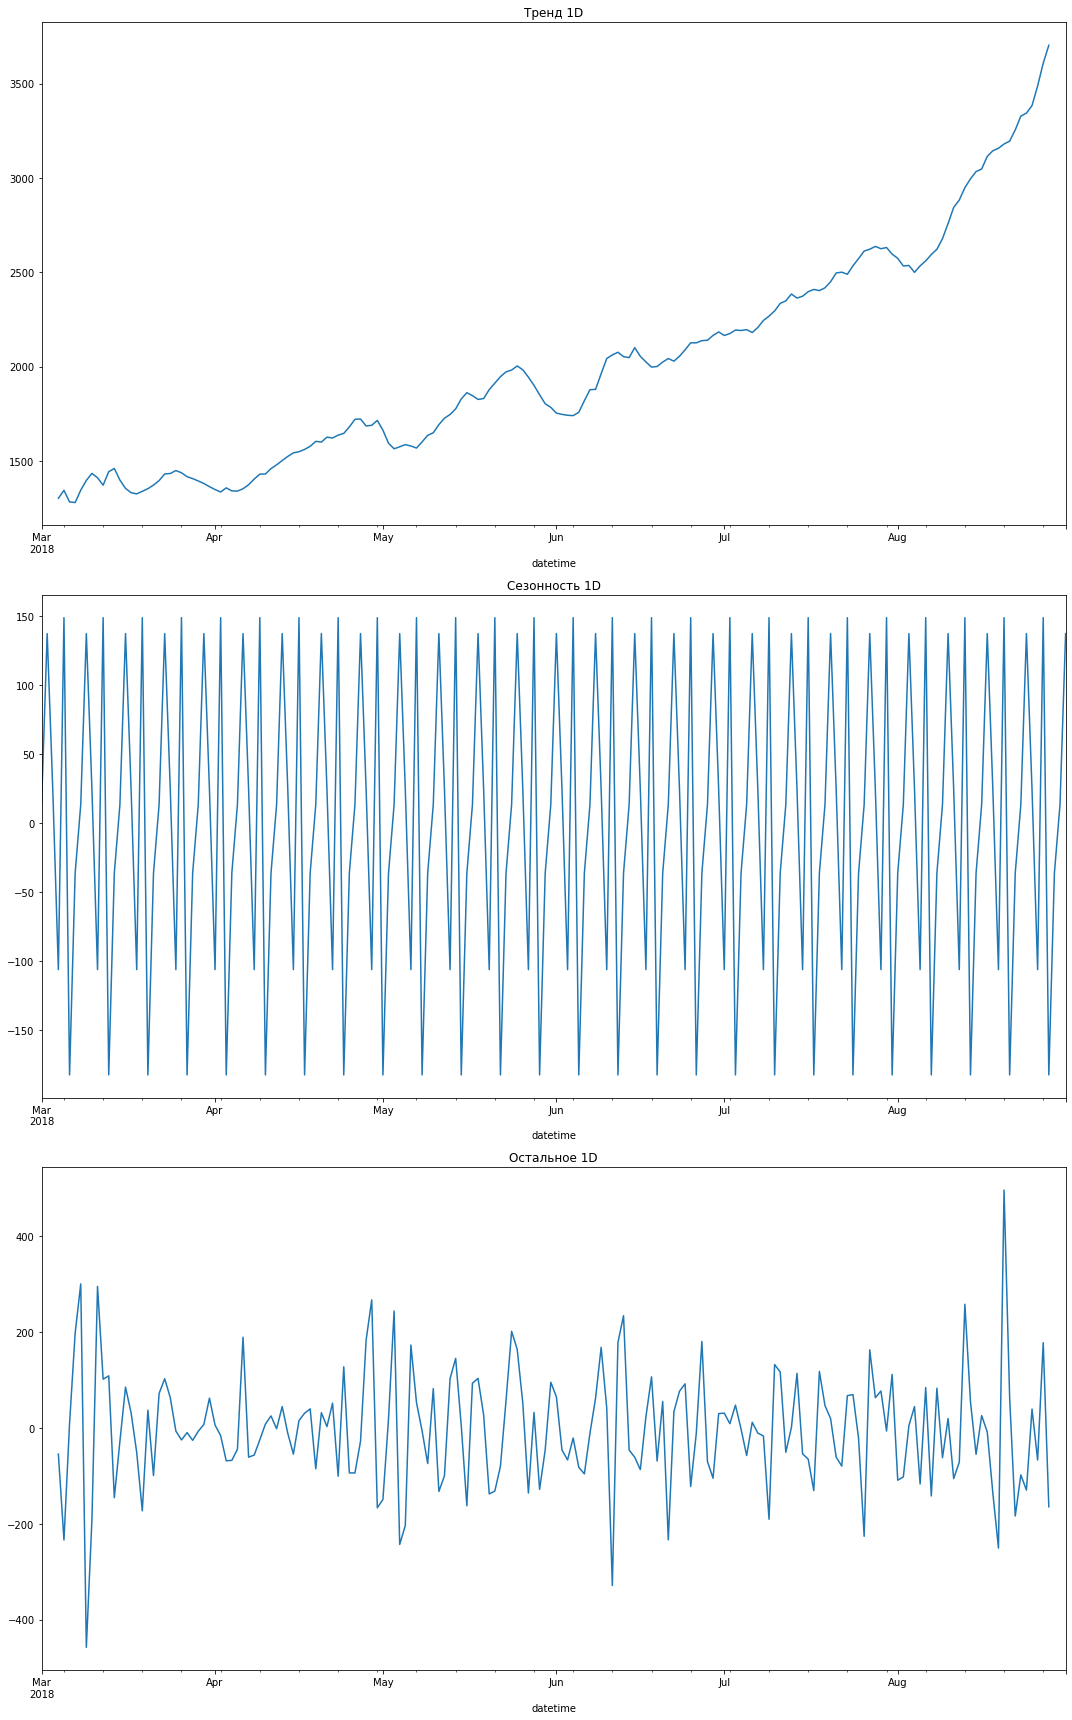

In [14]:
decomposed_day = seasonal_decompose(data_day)

plt.figure(figsize=figsize_1)

plt.subplot(311)
decomposed_day.trend.plot(ax=plt.gca())
plt.title('Тренд 1D')

plt.subplot(312)
decomposed_day.seasonal.plot(ax=plt.gca())
plt.title('Сезонность 1D')

plt.subplot(313)
decomposed_day.resid.plot(ax=plt.gca())
plt.title('Остальное 1D')
plt.tight_layout()

Теперь мы видим, что есть сезонность в заказе такси по неделям. Ниже изучим сезонность отдельно по неделе. Общий тренд по периоду - количество заказов такси растет.

Text(0.5, 1.0, '20-26 августа 2018 года')

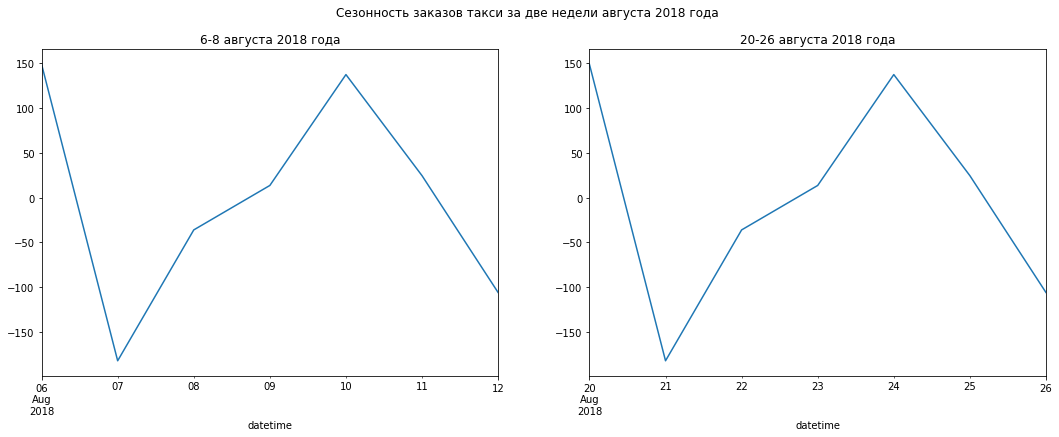

In [15]:
# построим графики за две разных недели заказов, выбрав даты с пн по воскресенье. Проследим сезонность по дням недели

fig, [ax0, ax1] = plt.subplots(1, 2, figsize = (18,6))
fig.suptitle('Сезонность заказов такси за две недели августа 2018 года')

decomposed_day.seasonal['2018-08-06':'2018-08-12'].plot(ax=ax0)
ax0.set_title('6-8 августа 2018 года')


decomposed_day.seasonal['2018-08-20':'2018-08-26'].plot(ax=ax1)
ax1.set_title('20-26 августа 2018 года')

Пик заказов по неделе идет в пн и пт. минимальное число заказов по вторникам.

<AxesSubplot:xlabel='datetime'>

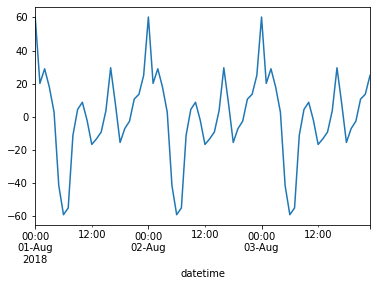

In [16]:
# посмотрим сезонное распеределение заказов по дню

decomposed.seasonal['2018-08-01':'2018-08-03'].plot()

Рассматривая сезонность по дням - примерно в середине ночи заказов меньше всего, количестко растет неравномерно с утра и достигает пика в полночь.

### Вывод

- Даны данные за полгода
- Наблюдается тренд к увеличению числа заказов
- Наблюдается сезонность по неделе - большинство заказов в пн и пт, наименьшее число во вт
- Наблюдается сезонность по дню - большинство заказов днем и достигает пика к полуночи
- Большинство заказов в час лежит в диапазоне 54 - 107 заказов в час
- Среднее число заказов 84  в час

In [17]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()

ts = taxi['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')


Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


## Обучение

### Подготовка данных

Подготовим данные для обучения

In [18]:
# функция, которая создает нам признаки для обучения модели

def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [19]:
# возьмем лаг 24 часа и среднее скользящее 3 суток

make_features(data, 168, 72)

In [20]:
data.head()

,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


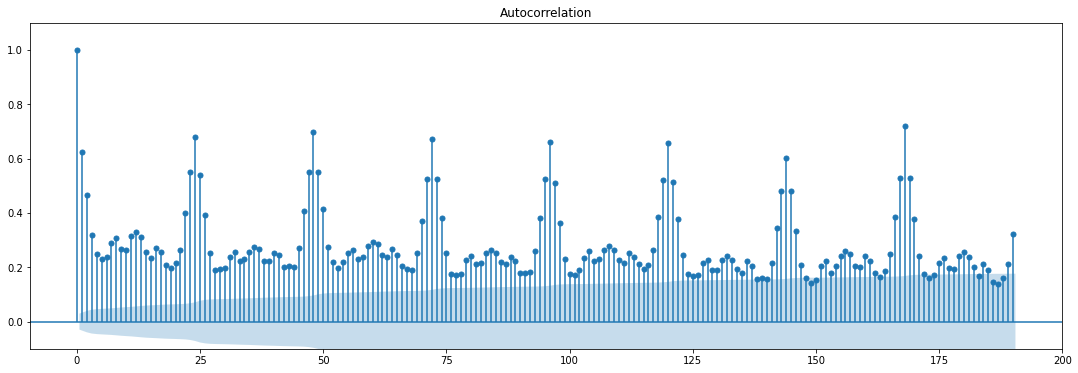

In [21]:
# Код ревьюера
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 




In [22]:
# разбиваем данные на выборки, удаляем пропуски в обучающей выборке

train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()
test = test.dropna()

target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)

target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

In [23]:
# выведем размерности

print(features_train.shape)
print(features_test.shape)

(3806, 171)
(442, 171)


In [24]:
# проверяем пропорции

print(round(features_train.shape[0]/data.shape[0],2))
print(round(features_test.shape[0]/data.shape[0],2))
print(round(target_train.shape[0]/data.shape[0],2))
print(round(target_test.shape[0]/data.shape[0],2))

0.86
0.1
0.86
0.1


In [25]:
print("Проверим индексы разбиений для features_train")
print(features_train.index.min())
print(features_train.index.max())
print("Проверим индексы разбиений для features_test")
print(features_test.index.min())
print(features_test.index.max())

Проверим индексы разбиений для features_train
2018-03-08 00:00:00
2018-08-13 13:00:00
Проверим индексы разбиений для features_test
2018-08-13 14:00:00
2018-08-31 23:00:00


In [26]:
print("Проверим индексы разбиений для target_train")
print(target_train.index.min())
print(target_train.index.max())
print("Проверим индексы разбиений для target_test")
print(target_test.index.min())
print(target_test.index.max())

Проверим индексы разбиений для target_train
2018-03-08 00:00:00
2018-08-13 13:00:00
Проверим индексы разбиений для target_test
2018-08-13 14:00:00
2018-08-31 23:00:00


### Подготовка вычислений

In [27]:
# создадим собственную функцию для подсчета rmse

def rmse(target, predicted):
    return round(mean_squared_error(target, predicted)** 0.5, 2)

'''
class ModelHelper:
    def __init__(self, name, model):
        self.name = name
        self.model = model
    
    def fit(self, features, target):   
        self.model.fit(features, target)

    
    def predict(self, features, target):
        predicted = self.model.predict(features)
        self.rmse = rmse(target, predicted)
    
    def getResult(self):
        return self.name, self.rmse
'''        

In [29]:
# создадим датафрейм, в который будем вписывать все полученные значения, чтобы не собирать их вручную 

df_model = {'Model': [], 'RMSE': []} 
 
df_model = pd.DataFrame(df_model) 
 
df_model.head() 

,Model,RMSE


### LinearRegression

In [30]:
my_scorer = make_scorer(rmse, greater_is_better=False)

# делаем разбиение временного ряда  с помощью TimeSeriesSplit для кросс-валидации

my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

In [31]:
# Для линейной регрессии GridSerachCV тоже можно использовать, с пустым словарём гиперпараметров
# - тогда будет просто выполнена кросс-валидация модели, что нам и нужно от линейной регрессии

params_LR = {}
model_LR = LinearRegression()


In [32]:
grid_LR = GridSearchCV(model_LR, params_LR, cv =my_cv, scoring=my_scorer)
grid_LR.fit(features_train, target_train)

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7fe2d9781d60>,
             estimator=LinearRegression(), param_grid={},
             scoring=make_scorer(rmse, greater_is_better=False))

In [33]:
rmse_LR = abs(round(grid_LR.best_score_, 2))
rmse_LR

23.5

In [34]:
model_LR_best = grid_LR.best_estimator_

In [35]:
# делаем расчеты для модели Линейной Регрессии и вносим в таблицу расчеты

df_model.loc[len(df_model.index)]=['LinearRegression', rmse_LR]


In [36]:
df_model.head()

,Model,RMSE
0,LinearRegression,23.5


### RandomForestRegressor

In [37]:
# установим небольшие параметры, чтобы не ждать часами

params_RFG = { 'n_estimators': range (1,10,1),
              'max_depth': range (1,10, 1)}

model_RFG = RandomForestRegressor()
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

In [38]:
# подберем лучшие параметры с помощью GridSearchCV

grid_RFG = GridSearchCV(model_RFG, params_RFG, cv = my_cv, scoring=my_scorer)
grid_RFG.fit(features_train, target_train)

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7fe2d99f26d0>,
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 10)},
             scoring=make_scorer(rmse, greater_is_better=False))

In [39]:
# узнаем лучшие параметры

grid_RFG.best_params_

{'max_depth': 9, 'n_estimators': 9}

In [40]:
# показатель RMSE на обучающей выборке

rmse_RFG = abs(round(grid_RFG.best_score_, 2))
rmse_RFG

24.33

In [41]:
model_RFG_best = grid_RFG.best_estimator_

In [42]:
# вносим данные в таблицу с результатами лучшей выбранной модели

df_model.loc[len(df_model.index)]=['RandomForestRegressor', rmse_RFG]

In [43]:
df_model.head()

,Model,RMSE
0,LinearRegression,23.50
1,RandomForestRegressor,24.33


### CatBoostRegressor

In [44]:
model_CBR = CatBoostRegressor(loss_function='RMSE',silent=True)

my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

params_CBR = {'iterations': range(1, 50,10),
              'depth': range(1,10,1)}

grid_CBR = GridSearchCV(model_CBR, params_CBR , cv= my_cv, scoring= my_scorer)
grid_CBR.fit(features_train, target_train)

grid_CBR.best_params_

{'depth': 1, 'iterations': 31}

In [45]:
rmse_CBR = abs(round(grid_CBR.best_score_, 2))
rmse_CBR

24.21

In [46]:
model_CBR_best = grid_CBR.best_estimator_

In [47]:
# вносим данные в таблицу с результатами лучшей выбранной модели

df_model.loc[len(df_model.index)]=['CatBoostRegressor', rmse_CBR]

In [48]:
df_model.head()

,Model,RMSE
0,LinearRegression,23.50
1,RandomForestRegressor,24.33
2,CatBoostRegressor,24.21


### LightGBM 

In [49]:
model_LGBM = LGBMRegressor(verbose=-1)
my_cv = TimeSeriesSplit(n_splits=3).split(features_train)

params_LGMB = {'n_estimators': range(1, 10, 2), 'num_leaves': range(5, 15, 2)}

grid_LGMB = GridSearchCV(model_LGBM, params_LGMB, cv= my_cv, scoring = my_scorer)
grid_LGMB.fit(features_train, target_train)

grid_LGMB.best_params_

{'n_estimators': 9, 'num_leaves': 13}

In [50]:
rmse_LGBM  = abs(round(grid_LGMB.best_score_, 2))
rmse_LGBM

28.86

In [51]:
model_LGMB_best = grid_LGMB.best_estimator_

In [52]:
# вносим данные в таблицу с результатами лучшей выбранной модели

df_model.loc[len(df_model.index)]=['LightGMB', rmse_LGBM]

In [53]:
df_model.head()

,Model,RMSE
0,LinearRegression,23.50
1,RandomForestRegressor,24.33
2,CatBoostRegressor,24.21
3,LightGMB,28.86


### Вывод

- Подготовили данные для обучения моделей
- Разделили данные на тестовую и тренировочную выборки в соотношении 10/90
- Обучили модели LinearRegression, RandomForestRegressor, CatBoostRegressor, LightGMB
- Показатели меньше 48 показали все модели 
- Луший показатель у модели LinearRegression

## Тестирование

Сравним полученные результаты со значением RMSE  при смещении ряда на один шаг. 

In [54]:
pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

print('RMSE для проверки модели на адекватность:', rmse(target_test, pred_previous))

RMSE для проверки модели на адекватность: 58.86


Теперь протестируем лучшую модель на тестовых данных.

In [57]:
#model_RFG_helper.fit(features_test,target_test)
predict = model_LR_best.predict(features_test)

print(rmse(target_test, predict))

34.63


Лучшая модель показала меньший, а значит адекватный параметр RMSE.

### Вывод

 - По итогам тестирования лучшей моделью оказалась LinearRegression со значением RMSE на тестовых данных 34.63
 - Мы использовали изменение всего двух параметров модели, если изменить большее число, возможно, можно будет получить лучший результат
 - Для улучшения качества предсказания лучше взять больший период данных - так мы сможем увидеть сезонность по году